### 1. Importing libs

In [2]:
# General libs
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Datasets
dataset = '/mnt/e/DeepLearningDatasets/ChestXray/FinalDS/'

### 2. Visualizing the data

In [5]:
n_train = len(os.listdir(os.path.join(dataset,'train/normal'))) + len(os.listdir(os.path.join(dataset,'train/pneumonia')))
n_validate = len(os.listdir(os.path.join(dataset,'validation/normal'))) + len(os.listdir(os.path.join(dataset,'validation/pneumonia')))
n_test=len(os.listdir(os.path.join(dataset,'test/normal'))) + len(os.listdir(os.path.join(dataset,'test/pneumonia')))

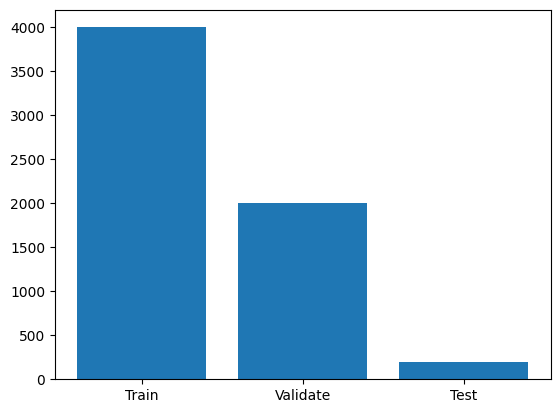

In [6]:
plt.bar(['Train', 'Validate', 'Test'],[n_train, n_validate, n_test])
plt.show()

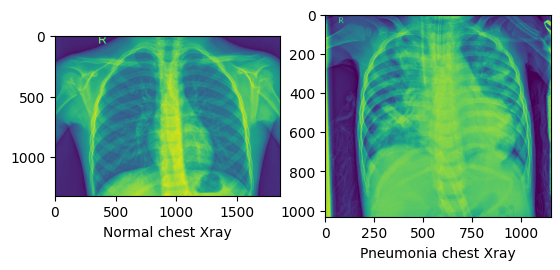

In [13]:
n_img = plt.imread(os.path.join(dataset,'train/normal/NORMAL_0.jpeg'))
p_img = plt.imread(os.path.join(dataset,'train/pneumonia/PNEUMONIA_0.jpeg'))
# plt.imshow(p_img)
# plt.show()

f, ax = plt.subplots(1, 2)
ax[0].imshow(n_img)
ax[1].imshow(p_img)
ax[0].set_xlabel("Normal chest Xray")
ax[1].set_xlabel("Pneumonia chest Xray")
plt.show()

### 3. Building data genrators

In [19]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import array_to_img, load_img, img_to_array

##### Train generator

In [15]:
# Data augmentations
train_datagen = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range = 30,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    zoom_range = 0.3,
    brightness_range = [0.4, 1.5],
)

In [16]:
train_dir = os.path.join(dataset,'train')
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (200, 200),
    batch_size = 32,
    class_mode = 'binary',
    color_mode = 'rgb',
    shuffle = True
)

Found 4000 images belonging to 2 classes.


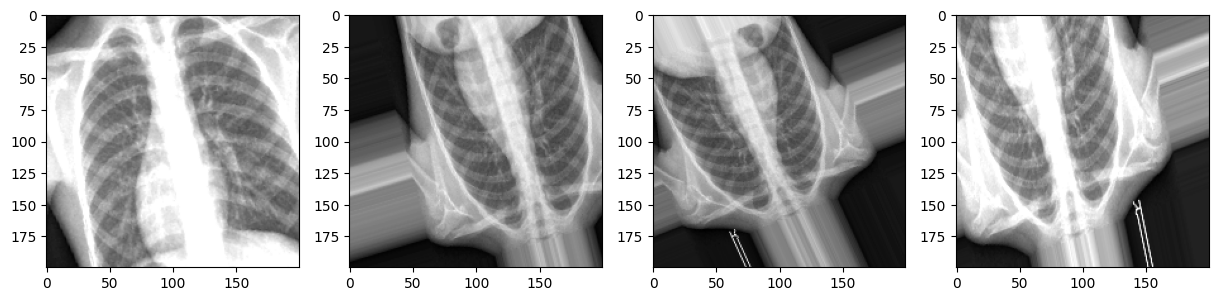

In [33]:
img = load_img(os.path.join(dataset,'train/normal/NORMAL_0.jpeg'), target_size = (200, 200))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 1
res = []
for batch in train_datagen.flow(x, batch_size = 1):
    if i % 5 == 0:
        break
    res.append(batch[0])
    i += 1

fig, ax = plt.subplots(1, 4, figsize=(15, 15))
ax[0].imshow(array_to_img(res[0]))
ax[1].imshow(array_to_img(res[1]))
ax[2].imshow(array_to_img(res[2]))
ax[3].imshow(array_to_img(res[3]))

##### Validation generator

In [34]:
validation_datagen = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range = 30,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    zoom_range = 0.3,
    brightness_range = [0.4, 1.5],
)

In [35]:
validation_dir = os.path.join(dataset,'validation')
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (200, 200),
    batch_size = 32,
    class_mode = 'binary',
    color_mode = 'rgb',
    shuffle = True
)

Found 2000 images belonging to 2 classes.


##### Test generator

In [36]:
test_datagen = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range = 30,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    zoom_range = 0.3,
    brightness_range = [0.4, 1.5],
)

In [37]:
test_dir = os.path.join(dataset,'test')
test_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size = (200, 200),
    batch_size = 32,
    class_mode = 'binary',
    color_mode = 'rgb',
    shuffle = True
)

Found 200 images belonging to 2 classes.
